# C4 - Métodos de Solução de EDOs

A solução numérica de Equações Diferenciais Ordinárias (EDOs) é uma tarefa comum em várias áreas da ciência e engenharia. Existem diversos métodos para resolver EDOs numericamente, cada um com suas características e aplicações específicas. Neste documento, abordaremos quatro métodos populares: Método de Euler, Método de Euler Aprimorado, Método de Euler Implícito e Método de Runge-Kutta de Quarta Ordem (RK4).

## Método de Euler

O Método de Euler é um dos métodos mais simples e diretos para resolver EDOs. Ele é um método explícito de passo único, onde a solução é aproximada por:

$$y_{n+1} = y_n + h f(t_n, y_n)$$

onde:
- $y_{n+1}$ é o valor da solução no próximo passo,
- $y_n$ é o valor atual da solução,
- $h$ é o tamanho do passo,
- $f(t_n, y_n)$ é a função que define a EDO.

### Vantagens
- Simplicidade de implementação.
- Rápido para cálculos com pequenas malhas de tempo.

### Desvantagens
- Baixa precisão.
- Pode ser instável se o tamanho do passo não for suficientemente pequeno.

## Método de Euler Aprimorado

O Método de Euler Aprimorado, também conhecido como Método de Heun, é uma melhoria do Método de Euler. Ele considera uma estimativa inicial com o Método de Euler e depois faz uma correção:

$$y_{n+1} = y_n + \frac{h}{2} \left[ f(t_n, y_n) + f(t_{n+1}, y_n + h f(t_n, y_n)) \right]$$

### Vantagens
- Maior precisão em comparação com o Método de Euler simples.
- Relativamente fácil de implementar.

### Desvantagens
- Ainda pode ser instável para passos grandes.

## Método de Euler Implícito

O Método de Euler Implícito é uma variante do Método de Euler onde o valor da solução no próximo passo é implícito. A fórmula é dada por:

$$y_{n+1} = y_n + h f(t_{n+1}, y_{n+1})$$

Para resolver essa equação, geralmente é necessário usar métodos iterativos, como o método de Newton.

### Vantagens
- Mais estável que o Método de Euler explícito.
- Adequado para problemas rígidos.

### Desvantagens
- Requer resolução de uma equação não linear a cada passo.
- Pode ser computacionalmente mais caro.

## Método de Runge-Kutta de Quarta Ordem (RK4)

O Método de Runge-Kutta de Quarta Ordem (RK4) é um dos métodos mais populares devido à sua precisão e estabilidade. Ele utiliza quatro avaliações da função para calcular a solução no próximo passo:


\begin{align*}
k_1 &= h f(t_n, y_n), \\
k_2 &= h f(t_n + \frac{h}{2}, y_n + \frac{k_1}{2}), \\
k_3 &= h f(t_n + \frac{h}{2}, y_n + \frac{k_2}{2}), \\
k_4 &= h f(t_n + h, y_n + k_3), \\
y_{n+1} &= y_n + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}

### Vantagens
- Alta precisão com passos relativamente grandes.
- Boa estabilidade para muitos problemas.

### Desvantagens
- Mais computacionalmente intensivo que os métodos de Euler.
- Pode ser complexo de implementar para problemas muito grandes.

## Conclusão

Os métodos de Euler, Euler Aprimorado, Euler Implícito e Runge-Kutta de Quarta Ordem (RK4) são ferramentas essenciais para a solução numérica de EDOs. A escolha do método depende do equilíbrio desejado entre precisão, estabilidade e custo computacional. Compreender as vantagens e desvantagens de cada método permite uma melhor seleção para aplicações específicas.


In [1]:
cd(@__DIR__);
println(pwd());

using Pkg;
Pkg.activate(pwd());
Pkg.add("Plots");

using Plots;
const build_dir = "build";
const source_dir = "src";

/home/vfegger/TEM-00200/C4


  Activating project at `~/TEM-00200/C4`
   Resolving package versions...
  No Changes to `~/TEM-00200/C4/Project.toml`
  No Changes to `~/TEM-00200/C4/Manifest.toml`


In [4]:
file = "euler.c"
output = "euler"
compile = `gcc $source_dir/$file -Wall -o $build_dir/$output -lm`
execute = `./$build_dir/$output`
run(compile)
run(execute)

Process(`./build/euler`, ProcessExited(0))

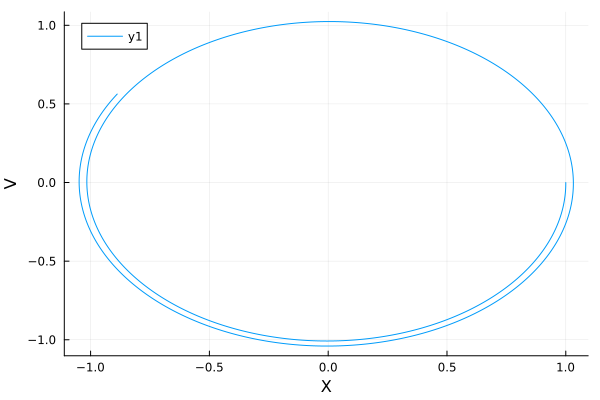

In [5]:
values_stream = readchomp("data.dat");
values_strings = split.(split(values_stream,"\n")[1:end-1],"\t");
index, values = parse.(Float64, first.(values_strings)), parse.(Float64, last.(values_strings));
plt = plot(index, values, xlabel="X", ylabel="V")
display(plt)